In [10]:
pip install librosa

In [12]:
import librosa

audio_file = librosa.load('test.wav')

# load the audio file as a waveform in y
# store the sample rate as sr
y, sr = audio_file

# load the tempo tracker to get the estimated tempo of the track
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [8]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 129.20 beats per minute


In [9]:
# convert the beat frames into timings
# beat_times will be an array of timestamps (in seconds) corresponding to detected beat events
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

array([ 0.06965986,  0.510839  ,  0.99845805,  1.46285714,  1.90403628,
        2.36843537,  2.83283447,  3.27401361,  3.76163265,  4.22603175,
        4.69043084,  5.13160998,  5.57278912,  6.03718821,  6.52480726,
        6.96598639,  7.43038549,  7.89478458,  8.38240363,  8.84680272,
        9.28798186,  9.729161  , 10.19356009, 10.65795918, 11.14557823,
       11.60997732, 12.07437642, 12.51555556, 12.95673469, 13.4675737 ,
       13.90875283])

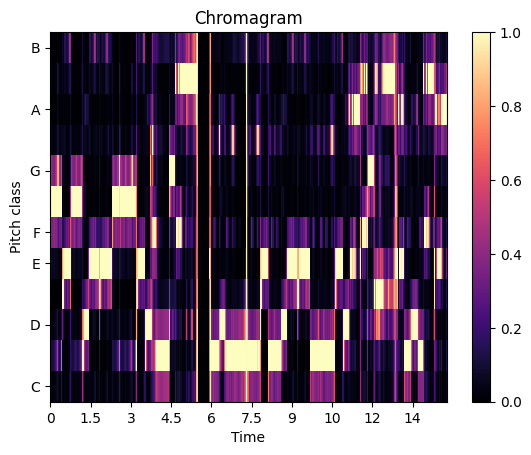

In [18]:
# visualize the musical note - 12 pitch classes
import librosa.display
import matplotlib.pyplot as plt

# Compute the chromagram from a waveform or power spectrogram.
chroma = librosa.feature.chroma_stft(y=y, sr=sr)


fig, ax = plt.subplots()

# Display the chromagram
# the energy in each chromatic pitch class as a function of time
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)

ax.set(title='Chromagram')
fig.colorbar(img, ax=ax)
plt.show()

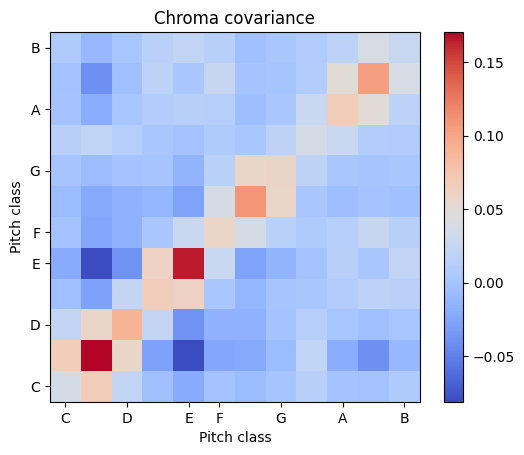

In [19]:
# understand it better
import numpy as np

ccov = np.cov(chroma)
fig, ax = plt.subplots()
img = librosa.display.specshow(ccov, y_axis = 'chroma', x_axis = 'chroma', ax=ax)
ax.set(title='Chroma covariance')
fig.colorbar(img,ax=ax)